In [5]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


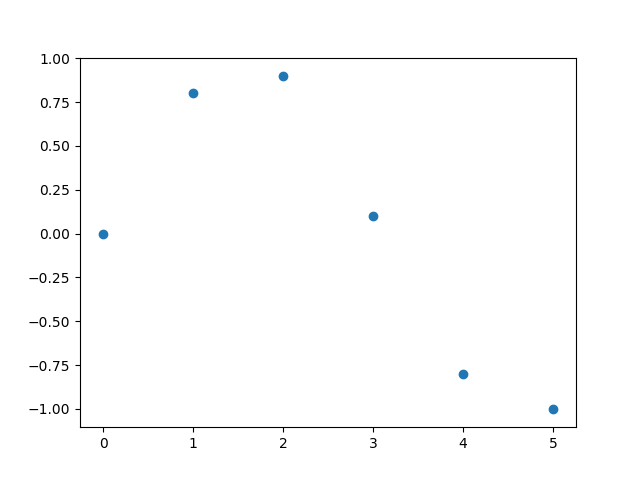

In [5]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
plt.scatter(x,y)
plt.show()

In [6]:
z = np.polyfit(x, y, 3)
print z

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


In [7]:
z = np.polyfit(x, y, 3)
p3 = np.poly1d(z)

In [8]:
z = np.polyfit(x, y, 30)
p30 = np.poly1d(z)

/home/guimas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


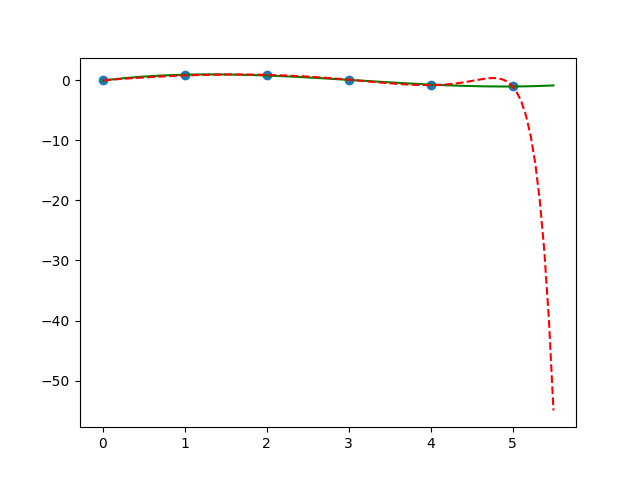

In [9]:
xp = np.linspace(-0,5.5,100)
plt.scatter(x,y)
plt.plot(xp, p3(xp), color='green')
plt.plot(xp, p30(xp), color='red', ls='--')
plt.show()

<IPython.core.display.Javascript object>


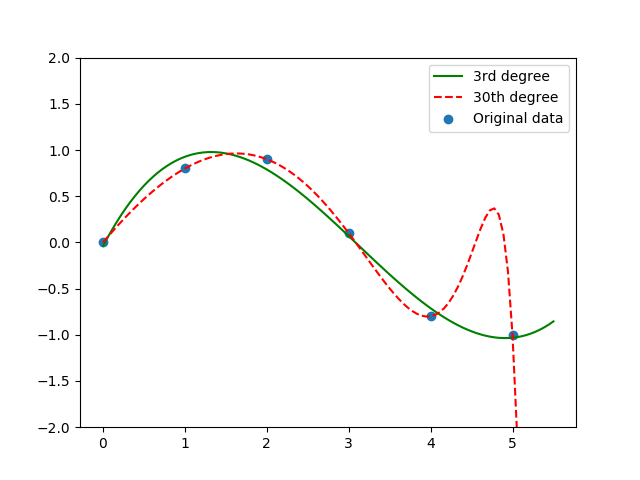

In [10]:
plt.scatter(x,y,label='Original data')
plt.plot(xp, p3(xp), color='green',label='3rd degree')
plt.plot(xp, p30(xp), color='red', ls='--', label='30th degree')
plt.ylim([-2,2])
plt.legend()
plt.show()

## Generic curve fitting

$$\Large{f(x) = a e^{-bx+c} + d}$$

In [6]:
def f(x, a, b, c, d):
    return a*np.exp(-b*x+c)+d

In [7]:
from scipy.optimize import *

In [8]:
x = np.linspace(0, 5, 50)
a = 1.5
b = 2.0
c = 0.5
d = 0.5
arr = (a,b,c,d)

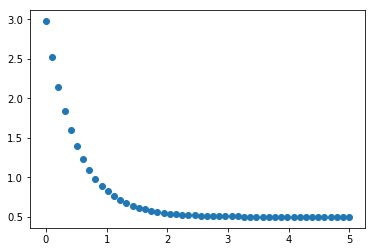

In [9]:
plt.scatter(x, f(x, *arr))
plt.show()

In [14]:
#Add some random noise
y_noise = f(x, *arr) + 0.2*np.random.normal(size=len(x))

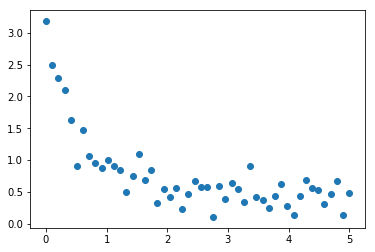

In [15]:
plt.scatter(x, y_noise)
plt.show()

Use non-linear least squares to fit a function, f, to data.

In [27]:
guess = [3.0, 1.0, 1.0, 0.5]
popt, pcov = curve_fit(f, x, y_noise, p0=guess)
#The optimised parameters of the fit
print "popt:", popt
#The covariance matrix of the parameters
print "pcov:", pcov
#One standard deviation errors on the parameters.
#perr = np.sqrt(np.diag(pcov))
#print "perr:", perr

popt: [ 1.76095377  1.88969136  0.39010185  0.46965916]
pcov: [[  1.01199802e+13   1.28857450e+04  -5.74687441e+12  -3.63026434e+03]
 [  1.28857471e+04   3.77591621e-02  -7.31747615e+03   3.70804092e-03]
 [ -5.74687441e+12  -7.31747494e+03   3.26350099e+12   2.06153283e+03]
 [ -3.63026399e+03   3.70804092e-03   2.06153263e+03   1.39492575e-03]]


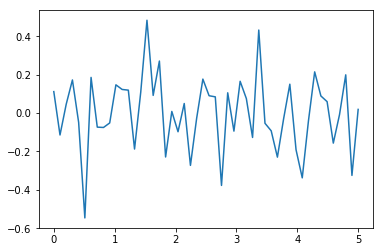

In [28]:
#Calculate R squared
residuals = y_noise - f(x, *popt)
plt.plot(x, residuals)
plt.show()

In [29]:
#Sum of the residuals squared
ss_res = np.sum(residuals**2)
#Total sum of squares
ss_tot = np.sum((y_noise-np.mean(y_noise))**2)
#R-Squared
Rsq = 1.0 - ss_res/ss_tot

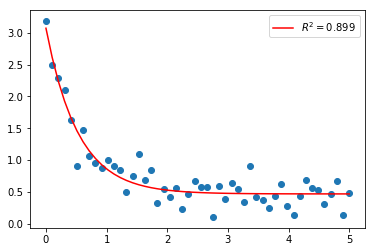

In [33]:
plt.scatter(x, y_noise)
strlabel = r'$R^2 = %0.3f$' % Rsq
plt.plot(x, f(x, *popt), color='red', label=strlabel)
plt.legend()
plt.show()

Sometimes you need to get constraints... and you need to be careful doing so!

In [40]:
popt2, pcov2 = curve_fit(f, x, y_noise, p0=guess, bounds=([0.0, 0.0, 0.0, 0.0], [3., 1., 2., 1.0]))
#The optimised parameters of the fit
print "popt:", popt2
#The covar2iance matrix of the parameters
print "pcov2:", pcov2
#One standard deviation errors on the parameters.
#perr2 = np.sqrt(np.diag(pcov2))
#print "perr2:", perr

popt: [ 1.37112002  1.          0.45709893  0.32250329]
pcov2: [[  7.54833818e+13  -3.27305172e+05  -5.50523515e+13  -8.63508095e+04]
 [ -3.27305172e+05   2.53335173e-02   2.38713731e+05   8.48616134e-03]
 [ -5.50523515e+13   2.38713731e+05   4.01513729e+13   6.29783001e+04]
 [ -8.63508095e+04   8.48616134e-03   6.29783001e+04   5.02283668e-03]]


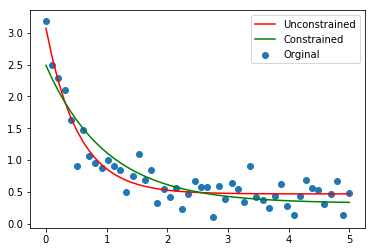

In [41]:
plt.scatter(x, y_noise, label='Orginal')
plt.plot(x, f(x, *popt), color='red', label='Unconstrained')
plt.plot(x, f(x, *popt2), color='green', label='Constrained')
plt.legend()
plt.show()